### Import Dependencies

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
import torch
from torchvision import datasets, transforms, models
from torch.utils.data.sampler import SubsetRandomSampler
import torch.nn as nn
import torch.nn.functional as F
from datetime import datetime
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

### Import Dataset

<b> Dataset Link (Plant Village Dataset ):</b><br> <a href='https://data.mendeley.com/datasets/tywbtsjrjv/1'> https://data.mendeley.com/datasets/tywbtsjrjv/1 </a>

In [ ]:
transform = transforms.Compose([
    transforms.Resize(255),
    transforms.CenterCrop(224),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(20),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.RandomGrayscale(p=0.1),
    transforms.ToTensor()
])

In [ ]:
dataset = datasets.ImageFolder(r"/content/drive/MyDrive/dataset", transform=transform)

In [ ]:
dataset

Dataset ImageFolder
    Number of datapoints: 968
    Root location: /content/drive/MyDrive/dataset
    StandardTransform
Transform: Compose(
               Resize(size=255, interpolation=bilinear, max_size=None, antialias=True)
               CenterCrop(size=(224, 224))
               RandomHorizontalFlip(p=0.5)
               RandomRotation(degrees=[-20.0, 20.0], interpolation=nearest, expand=False, fill=0)
               ColorJitter(brightness=(0.8, 1.2), contrast=(0.8, 1.2), saturation=(0.8, 1.2), hue=(-0.1, 0.1))
               RandomGrayscale(p=0.1)
               ToTensor()
           )

In [ ]:
indices = list(range(len(dataset)))

In [ ]:
train_size = int(np.floor(0.80 * len(dataset)))

In [ ]:
validation_size = int(np.floor(0.10 * len(dataset)))

In [ ]:
test_size = len(dataset) - train_size - validation_size

In [ ]:
print(0,train_size ,validation_size,test_size, len(dataset))

0 774 96 98 968


In [ ]:
print(f"Length of training size: {train_size}")
print(f"Length of validation size: {validation_size}")
print(f"Length of test size: {test_size}")

Length of training size: 774
Length of validation size: 96
Length of test size: 98


In [ ]:
np.random.shuffle(indices)

### Split into Train and Test

In [ ]:
train_indices, validation_indices, test_indices = (
    indices[:train_size],
    indices[train_size:train_size + validation_size],
    indices[train_size + validation_size:]
)

In [ ]:
train_sampler = SubsetRandomSampler(train_indices)
validation_sampler = SubsetRandomSampler(validation_indices)
test_sampler = SubsetRandomSampler(test_indices)

In [ ]:
targets_size = len(dataset.class_to_idx)

### Model

<b>Convolution Arithmetic Equation : </b>(W - F + 2P) / S + 1 <br>
W = Input Size<br>
F = Filter Size<br>
P = Padding Size<br>
S = Stride <br>

### Transfer Learning

In [ ]:
# model = models.vgg16(pretrained=True)

In [ ]:
# for params in model.parameters():
#     params.requires_grad = False

In [ ]:
# model

In [ ]:
# n_features = model.classifier[0].in_features
# n_features

In [ ]:
# model.classifier = nn.Sequential(
#     nn.Linear(n_features, 1024),
#     nn.ReLU(),
#     nn.Dropout(0.4),
#     nn.Linear(1024, targets_size),
# )

In [ ]:
# model

### Original Modeling

In [ ]:
class CNN(nn.Module):
    def __init__(self, K):
        super(CNN, self).__init__()
        self.conv_layers = nn.Sequential(
            # conv1
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.MaxPool2d(2),
            # conv2
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.MaxPool2d(2),
            # conv3
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.MaxPool2d(2),
            # conv4
            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(256),
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(256),
            nn.MaxPool2d(2),
        )

        self.dense_layers = nn.Sequential(
            nn.Dropout(0.4),
            nn.Linear(50176, 1024),
            nn.ReLU(),
            nn.Dropout(0.4),
            nn.Linear(1024, K),
        )

    def forward(self, X):
        out = self.conv_layers(X)

        out = out.view(-1, 50176)

        out = self.dense_layers(out)

        return out

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [ ]:
device = "cpu"

In [ ]:
model = CNN(targets_size)

In [ ]:
model.to(device)

CNN(
  (conv_layers): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)

In [ ]:
from torchsummary import summary

summary(model, (3, 224, 224))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 224, 224]             896
              ReLU-2         [-1, 32, 224, 224]               0
       BatchNorm2d-3         [-1, 32, 224, 224]              64
            Conv2d-4         [-1, 32, 224, 224]           9,248
              ReLU-5         [-1, 32, 224, 224]               0
       BatchNorm2d-6         [-1, 32, 224, 224]              64
         MaxPool2d-7         [-1, 32, 112, 112]               0
            Conv2d-8         [-1, 64, 112, 112]          18,496
              ReLU-9         [-1, 64, 112, 112]               0
      BatchNorm2d-10         [-1, 64, 112, 112]             128
           Conv2d-11         [-1, 64, 112, 112]          36,928
             ReLU-12         [-1, 64, 112, 112]               0
      BatchNorm2d-13         [-1, 64, 112, 112]             128
        MaxPool2d-14           [-1

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

### Batch Gradient Descent

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"

def batch_gd(model, criterion, train_loader, test_loader, epochs):


    model.to(device)

    train_losses = np.zeros(epochs)
    validation_losses = np.zeros(epochs)

    for e in range(epochs):
        t0 = datetime.now()
        train_loss = []
        for inputs, targets in train_loader:
            inputs, targets = inputs.to(device), targets.to(device)

            optimizer.zero_grad()

            output = model(inputs)

            loss = criterion(output, targets)

            train_loss.append(loss.item())  # torch to numpy world

            loss.backward()
            optimizer.step()

        train_loss = np.mean(train_loss)

        validation_loss = []

        for inputs, targets in test_loader:

            inputs, targets = inputs.to(device), targets.to(device)

            output = model(inputs)

            loss = criterion(output, targets)

            validation_loss.append(loss.item())

        validation_loss = np.mean(validation_loss)

        train_losses[e] = train_loss
        validation_losses[e] = validation_loss

        dt = datetime.now() - t0

        print(
            f"Epoch : {e+1}/{epochs} Train_loss:{train_loss:.3f} Test_loss:{validation_loss:.3f} Duration:{dt}"
        )

    return train_losses, validation_losses

In [ ]:
device = "cpu"

In [ ]:
batch_size = 64
train_loader = torch.utils.data.DataLoader(
    dataset, batch_size=batch_size, sampler=train_sampler
)
test_loader = torch.utils.data.DataLoader(
    dataset, batch_size=batch_size, sampler=test_sampler
)
validation_loader = torch.utils.data.DataLoader(
    dataset, batch_size=batch_size, sampler=validation_sampler
)

In [ ]:
train_losses, validation_losses = batch_gd(
    model, criterion, train_loader, validation_loader, 10
)

Epoch : 1/10 Train_loss:10.290 Test_loss:8.955 Duration:0:09:11.048686
Epoch : 2/10 Train_loss:5.893 Test_loss:6.839 Duration:0:03:58.805630
Epoch : 3/10 Train_loss:4.051 Test_loss:5.237 Duration:0:03:56.203978
Epoch : 4/10 Train_loss:3.415 Test_loss:4.758 Duration:0:03:55.408260
Epoch : 5/10 Train_loss:2.492 Test_loss:4.288 Duration:0:03:58.724273
Epoch : 6/10 Train_loss:2.436 Test_loss:4.720 Duration:0:03:58.992428
Epoch : 7/10 Train_loss:1.129 Test_loss:5.029 Duration:0:03:57.323054
Epoch : 8/10 Train_loss:1.570 Test_loss:5.918 Duration:0:03:55.819366
Epoch : 9/10 Train_loss:0.580 Test_loss:5.734 Duration:0:03:56.042991
Epoch : 10/10 Train_loss:0.868 Test_loss:6.121 Duration:0:03:57.621428


### Save the Model

In [ ]:
# torch.save(model.state_dict() , '/content/drive/MyDrive/saves model/hybrid-model-3.pt')

### Load Model

In [ ]:
targets_size = 39
model = CNN(targets_size)
model.load_state_dict(torch.load("/content/drive/MyDrive/saves model/hybrid-model-3.pt"))
model.eval()

<ipython-input-27-0d2d80de3e19>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("/content/drive/MyDrive/saves model/hybrid-model-3.pt"))


CNN(
  (conv_layers): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)

In [ ]:
# %matplotlib notebook

### Plot the loss

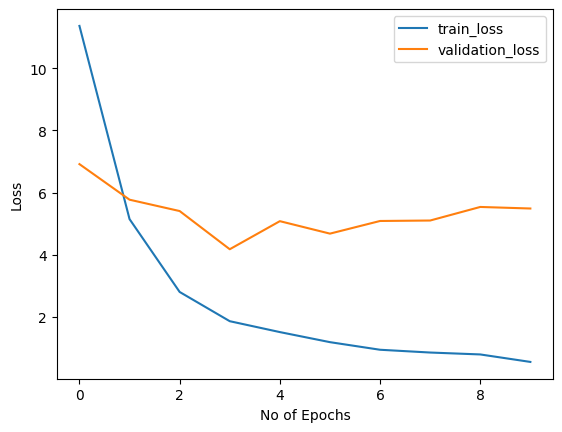

In [ ]:
import matplotlib.pyplot as plt

plt.plot(train_losses , label = 'train_loss')
plt.plot(validation_losses , label = 'validation_loss')
plt.xlabel('No of Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Accuracy

Acccuracy of **Training**


In [ ]:
import torch
from sklearn.metrics import precision_score, recall_score, f1_score

def evaluate_model(model, loader):
    model.eval()
    all_preds = []
    all_targets = []
    n_correct = 0
    n_total = 0

    with torch.no_grad():
        for inputs, targets in loader:
            inputs, targets = inputs.to("cpu"), targets.to("cpu")

            outputs = model(inputs)
            _, predictions = torch.max(outputs, 1)

            all_preds.extend(predictions.tolist())
            all_targets.extend(targets.tolist())

            n_correct += (predictions == targets).sum().item()
            n_total += targets.size(0)

    # Calculate metrics
    acc = n_correct / n_total
    precision = precision_score(all_targets, all_preds, average='macro')
    recall = recall_score(all_targets, all_preds, average='macro')
    f1 = f1_score(all_targets, all_preds, average='macro')

    return acc, precision, recall, f1


train_acc, train_prec, train_recall, train_f1 = evaluate_model(model, train_loader)


print(f"Training Accuracy: {train_acc:.4f}")
print(f"Training Precision: {train_prec:.4f}")
print(f"Training Recall: {train_recall:.4f}")
print(f"Training F1 Score: {train_f1:.4f}")


Training Accuracy: 0.9538
Training Precision: 0.9578
Training Recall: 0.9551
Training F1 Score: 0.9542


Accuracy of **Testing**

In [ ]:
import torch
from sklearn.metrics import precision_score, recall_score, f1_score

def evaluate_model(model, loader):
    model.eval()
    all_preds = []
    all_targets = []
    n_correct = 0
    n_total = 0

    with torch.no_grad():
        for inputs, targets in loader:
            inputs, targets = inputs.to("cpu"), targets.to("cpu")

            outputs = model(inputs)
            _, predictions = torch.max(outputs, 1)

            all_preds.extend(predictions.tolist())
            all_targets.extend(targets.tolist())

            n_correct += (predictions == targets).sum().item()
            n_total += targets.size(0)


    acc = n_correct / n_total
    precision = precision_score(all_targets, all_preds, average='macro')
    recall = recall_score(all_targets, all_preds, average='macro')
    f1 = f1_score(all_targets, all_preds, average='macro')

    return acc, precision, recall, f1


test_acc, test_prec, test_recall, test_f1 = evaluate_model(model, test_loader)


print(f"Testing Accuracy: {test_acc:.4f}")
print(f"Testing Precision: {test_prec:.4f}")
print(f"Testing Recall: {test_recall:.4f}")
print(f"Testing F1 Score: {test_f1:.4f}")


Testing Accuracy: 0.9009
Testing Precision: 0.9251
Testing Recall: 0.9019
Testing F1 Score: 0.9056


Accuracy of **Validation**

In [ ]:
import torch
from sklearn.metrics import precision_score, recall_score, f1_score

def evaluate_model(model, loader):
    model.eval()
    all_preds = []
    all_targets = []
    n_correct = 0
    n_total = 0

    with torch.no_grad():
        for inputs, targets in loader:
            inputs, targets = inputs.to("cpu"), targets.to("cpu")

            outputs = model(inputs)
            _, predictions = torch.max(outputs, 1)

            all_preds.extend(predictions.tolist())
            all_targets.extend(targets.tolist())

            n_correct += (predictions == targets).sum().item()
            n_total += targets.size(0)


    acc = n_correct / n_total
    precision = precision_score(all_targets, all_preds, average='macro')
    recall = recall_score(all_targets, all_preds, average='macro')
    f1 = f1_score(all_targets, all_preds, average='macro')

    return acc, precision, recall, f1


Validation_acc, Validation_prec, Validation_recall, Validation_f1 = evaluate_model(model, validation_loader)


print(f"Validation Accuracy: {Validation_acc:.4f}")
print(f"Validation Precision: {Validation_prec:.4f}")
print(f"Validation Recall: {Validation_recall:.4f}")
print(f"Validation F1 Score: {Validation_f1:.4f}")


Validation Accuracy: 0.8093
Validation Precision: 0.8491
Validation Recall: 0.7975
Validation F1 Score: 0.7893


AUC and ROC Curves

AUC-ROC: 0.8958


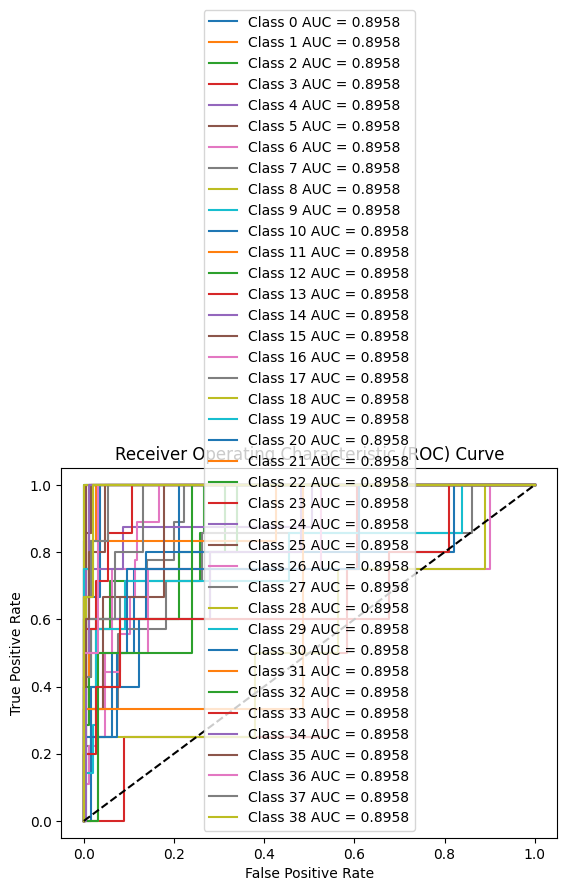

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import torch
import numpy as np

def calculate_auc_roc(y_true, y_pred):

    auc = roc_auc_score(y_true, y_pred, multi_class='ovr')
    print(f"AUC-ROC: {auc:.4f}")

    n_classes = y_pred.shape[1]
    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_true, y_pred[:, i], pos_label=i)
        plt.plot(fpr, tpr, label=f'Class {i} AUC = {auc:.4f}')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='best')
    plt.show()

all_targets = []
all_preds_probs = []
with torch.no_grad():
    for inputs, targets in test_loader:
        inputs, targets = inputs.to("cpu"), targets.to("cpu")
        outputs = model(inputs)
        probs = torch.softmax(outputs, dim=1)
        all_preds_probs.extend(probs.cpu().numpy())
        all_targets.extend(targets.tolist())

y_true = all_targets
y_pred = np.array(all_preds_probs)

calculate_auc_roc(y_true, y_pred)

Combined Graph of Alexnet, Lenet and Hybrid

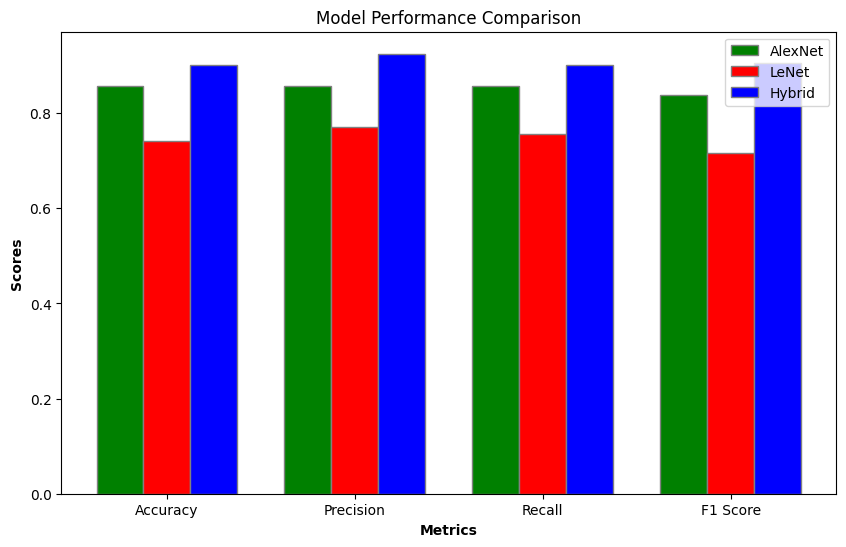

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the models
models = ['AlexNet', 'LeNet', 'Hybrid']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# Example values: Replace these with your actual values for each model
alexnet_values = [0.8571, 0.8578, 0.8571, 0.8381]
lenet_values = [0.7423, 0.7708, 0.7561, 0.7158]
hybrid_values = [0.9009, 0.9251, 0.9019, 0.9056]

# Set width of bars
barWidth = 0.25

# Set position of bar on X axis
r1 = np.arange(len(alexnet_values))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Make the bar chart
plt.bar(r1, alexnet_values, color='green', width=barWidth, edgecolor='grey', label='AlexNet')
plt.bar(r2, lenet_values, color='red', width=barWidth, edgecolor='grey', label='LeNet')
plt.bar(r3, hybrid_values, color='blue', width=barWidth, edgecolor='grey', label='Hybrid')

# Add labels
plt.xlabel('Metrics', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(alexnet_values))], metrics)
plt.ylabel('Scores', fontweight='bold')
plt.title('Model Performance Comparison')

# Add legend
plt.legend()

# Display the chart
plt.show()


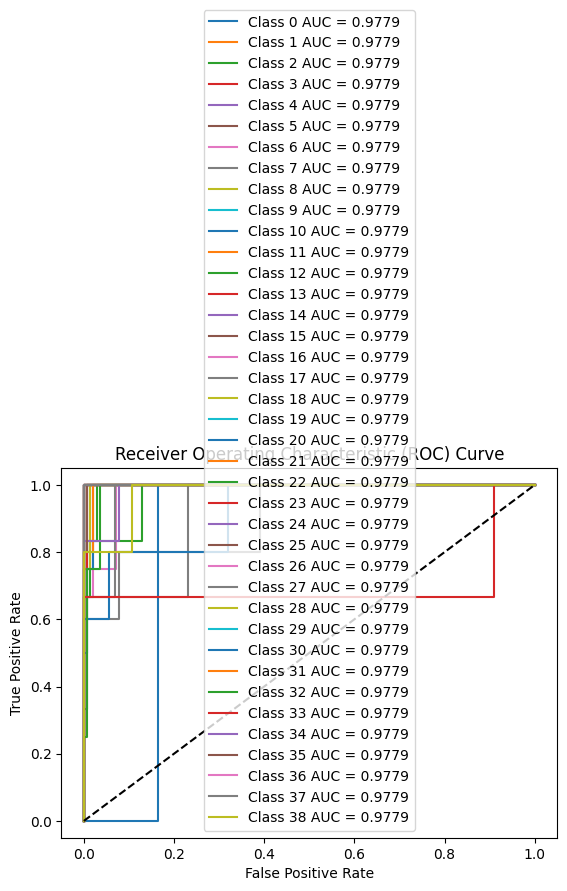

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import torch
import numpy as np

# Assuming `y_true` (true labels) and `y_pred` (predicted probabilities) are available from your model's predictions
def calculate_auc_roc(y_true, y_pred):
    # Compute AUC score
    # Added multi_class='ovr' to handle multi-class classification
    auc = roc_auc_score(y_true, y_pred, multi_class='ovr')
    print(f"AUC-ROC: {auc:.4f}")

    # ... (rest of the function remains the same)

    # Plot ROC curve
    # Assuming you want to plot ROC for each class separately
    n_classes = y_pred.shape[1]
    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_true, y_pred[:, i], pos_label=i)
        plt.plot(fpr, tpr, label=f'Class {i} AUC = {auc:.4f}')

    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line (random guessing)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='best')
    plt.show()

# Example usage - REPLACE with your actual data
# Assuming you have a validation or test loader:
all_targets = []
all_preds_probs = [] # Store predicted probabilities here
with torch.no_grad():
    for inputs, targets in test_loader: # Replace with your loader
        inputs, targets = inputs.to("cpu"), targets.to("cpu")
        outputs = model(inputs)
        probs = torch.softmax(outputs, dim=1) # Get probabilities for all classes
        all_preds_probs.extend(probs.cpu().numpy()) # Convert to numpy and extend
        all_targets.extend(targets.tolist())

y_true = all_targets
y_pred = np.array(all_preds_probs) # Convert to numpy array

# Call the function after training
calculate_auc_roc(y_true, y_pred)

### Single Image Prediction

In [ ]:
transform_index_to_disease = dataset.class_to_idx

In [ ]:
transform_index_to_disease = dict(
    [(value, key) for key, value in transform_index_to_disease.items()]
)

In [ ]:
data = pd.read_csv("disease_info.csv", encoding="cp1252")

In [ ]:
from PIL import Image
import torchvision.transforms.functional as TF

In [ ]:
def single_prediction(image_path):
    image = Image.open(image_path)
    image = image.resize((224, 224))
    input_data = TF.to_tensor(image)
    input_data = input_data.view((-1, 3, 224, 224))
    output = model(input_data)
    output = output.detach().numpy()
    index = np.argmax(output)
    print("Original : ", image_path[12:-4])
    pred_csv = data["disease_name"][index]
    print(pred_csv)

In [ ]:
single_prediction("test_images/Apple_ceder_apple_rust.JPG")

### Wrong Prediction

In [ ]:
single_prediction("test_images/Apple_scab.JPG")

In [ ]:
single_prediction("test_images/Grape_esca.JPG")

In [ ]:
single_prediction("test_images/apple_black_rot.JPG")

In [ ]:
single_prediction("test_images/apple_healthy.JPG")

In [ ]:
single_prediction("test_images/background_without_leaves.jpg")

In [ ]:
single_prediction("test_images/blueberry_healthy.JPG")

In [ ]:
single_prediction("test_images/cherry_healthy.JPG")

In [ ]:
single_prediction("test_images/cherry_powdery_mildew.JPG")

In [ ]:
single_prediction("test_images/corn_cercospora_leaf.JPG")

In [ ]:
single_prediction("test_images/corn_common_rust.JPG")

In [ ]:
single_prediction("test_images/corn_healthy.jpg")

In [ ]:
single_prediction("test_images/corn_northen_leaf_blight.JPG")

In [ ]:
single_prediction("test_images/grape_black_rot.JPG")

In [ ]:
single_prediction("test_images/grape_healthy.JPG")

In [ ]:
single_prediction("test_images/grape_leaf_blight.JPG")

In [ ]:
single_prediction("test_images/orange_haunglongbing.JPG")

In [ ]:
single_prediction("test_images/peach_bacterial_spot.JPG")

In [ ]:
single_prediction("test_images/peach_healthy.JPG")

In [ ]:
single_prediction("test_images/pepper_bacterial_spot.JPG")

In [ ]:
single_prediction("test_images/pepper_bell_healthy.JPG")

In [ ]:
single_prediction("test_images/potato_early_blight.JPG")

In [ ]:
single_prediction("test_images/potato_healthy.JPG")

In [ ]:
single_prediction("test_images/potato_late_blight.JPG")

In [ ]:
single_prediction("test_images/raspberry_healthy.JPG")

In [ ]:
single_prediction("test_images/soyaben healthy.JPG")

In [ ]:
single_prediction("test_images/potato_late_blight.JPG")

In [ ]:
single_prediction("test_images/squash_powdery_mildew.JPG")

In [ ]:
single_prediction("test_images/strawberry_healthy.JPG")

In [ ]:
single_prediction("test_images/strawberry_leaf_scorch.JPG")

In [ ]:
single_prediction("test_images/tomato_bacterial_spot.JPG")

In [ ]:
single_prediction("test_images/tomato_early_blight.JPG")

In [ ]:
single_prediction("test_images/tomato_healthy.JPG")

In [ ]:
single_prediction("test_images/tomato_late_blight.JPG")

In [ ]:
single_prediction("test_images/tomato_leaf_mold.JPG")

In [ ]:
single_prediction("test_images/tomato_mosaic_virus.JPG")

In [ ]:
single_prediction("test_images/tomato_septoria_leaf_spot.JPG")

In [ ]:
single_prediction("test_images/tomato_spider_mites_two_spotted_spider_mites.JPG")

In [ ]:
single_prediction("test_images/tomato_target_spot.JPG")

In [ ]:
single_prediction("test_images/tomato_yellow_leaf_curl_virus.JPG")